In [447]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates
import copy
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('paper')
sns.set_color_codes()

In [761]:
data = p.read_csv('#blessed_data_18Feb2020.csv')

data['Person'] = [entry.replace(' ','') for entry in data['Person'].values]

data['Datetime'] = [datetime.strptime(entry,'%m/%d/%Y %H:%M:%S') for entry in data['Datetime'].values]


data['ReportedBy'] = ['multiple' if '/' in entry else entry.replace(' ','') for entry in data['ReportedBy'].values]

data = data[data['Number']<30]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid valu

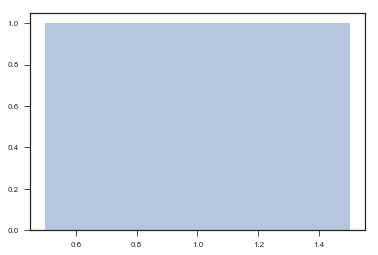

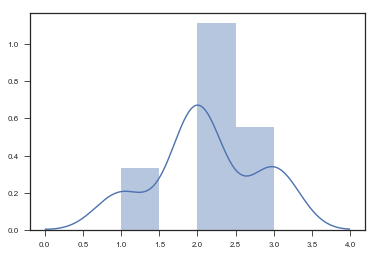

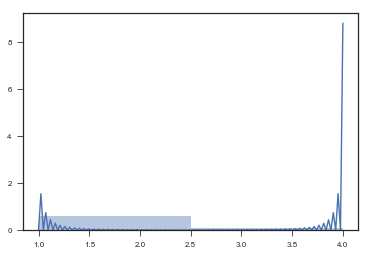

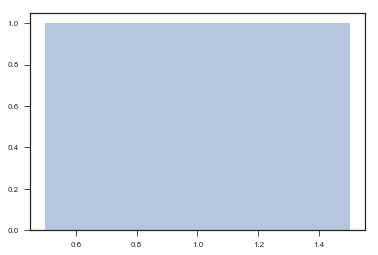

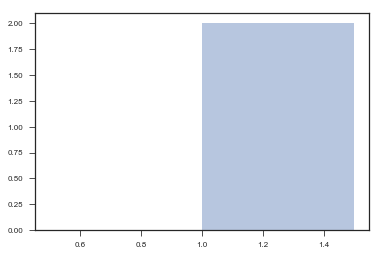

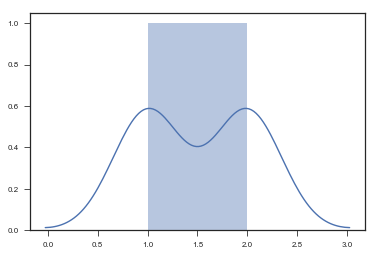

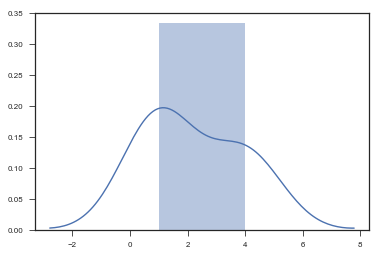

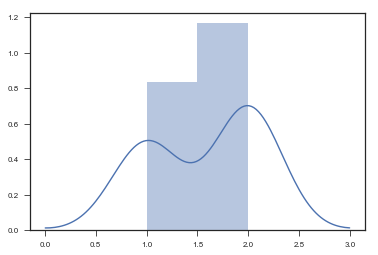

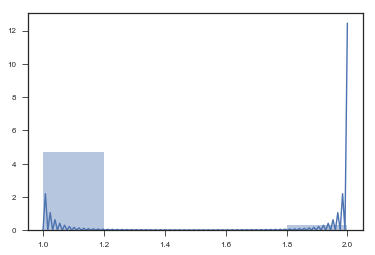

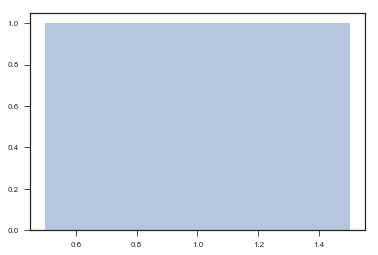

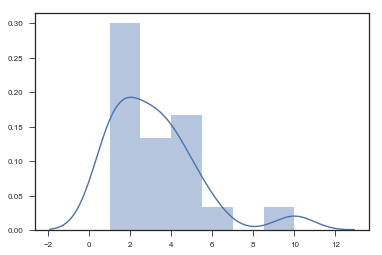

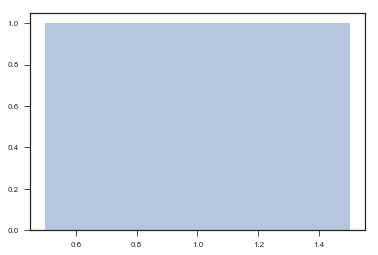

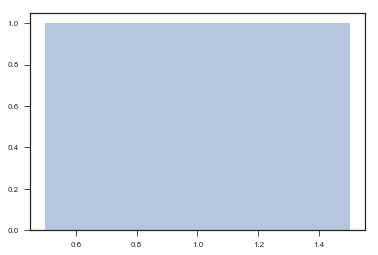

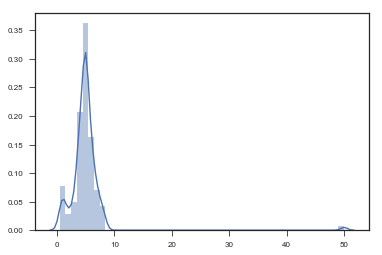

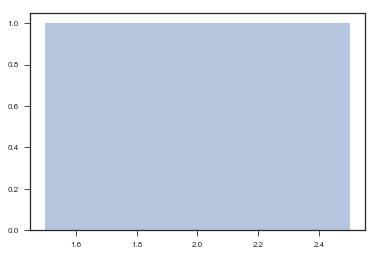

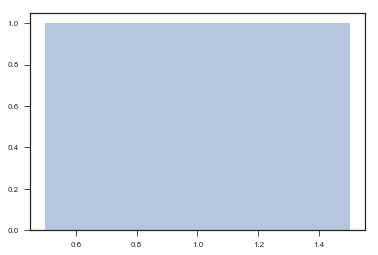

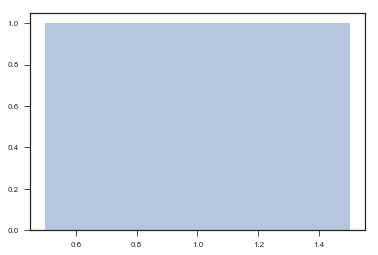

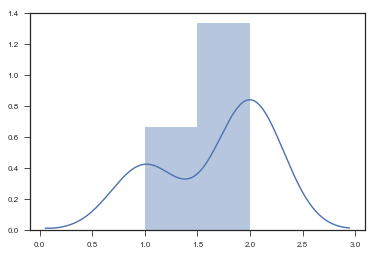

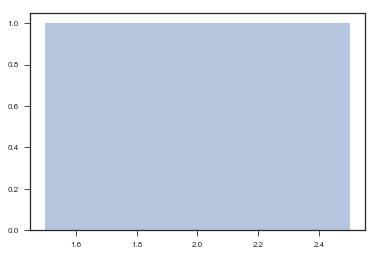

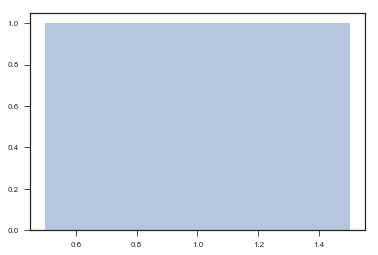

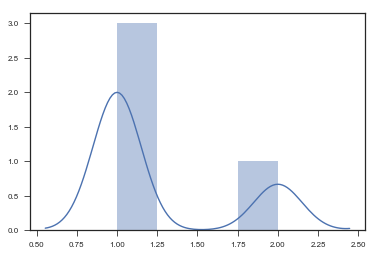

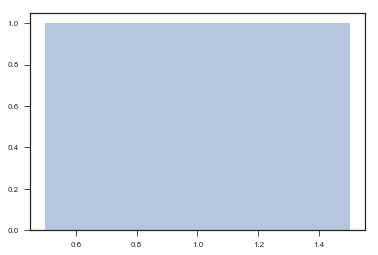

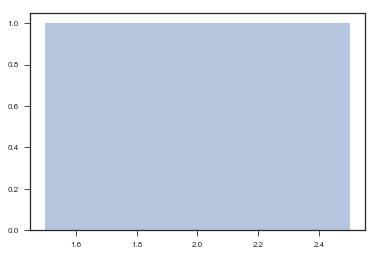

In [78]:
for name in np.unique(data['Person'].values):
    this_person = data[data['Person']==name]
    if len(this_person.index) >0:
        plt.figure()
        sns.distplot(this_person['Number'].values)

In [79]:
np.unique(data['Person'].values,return_counts=True)

(array(['Bernard', 'Carly', 'Chris', 'Chuan', 'David', 'Dmitri', 'Ellie',
        'EmilyEbel', 'Grant', 'Jess', 'Jose', 'Katherine', 'Katie',
        'Monica', 'Roshni', 'Sean', 'Sharon', 'Susanne', 'Tuya',
        'Victoria', 'Vivian', 'Yuping', 'unknown'], dtype=object),
 array([  1,  18,   8,   1,   4,   2,   5,  12,  34,   1,  20,   1,   1,
        142,   1,   2,   2,   3,   1,   1,   4,   1,   1]))

In [80]:
sorted([(y,x) for x,y in zip(np.unique(data['ReportedBy'].values,return_counts=True)[0],np.unique(data['ReportedBy'].values,return_counts=True)[1])],reverse=True)

[(40, 'Vivian'),
 (39, 'EmilyEbel'),
 (38, 'Monica'),
 (23, 'Grant'),
 (17, 'Susanne'),
 (17, 'Carly'),
 (14, 'David'),
 (13, 'Chris'),
 (11, 'Bernard'),
 (9, 'Kerry'),
 (7, 'Ellie'),
 (5, 'Roshni'),
 (4, 'Sean'),
 (4, 'Katherine'),
 (4, 'Jose'),
 (4, 'Emily'),
 (3, 'Yuping'),
 (3, 'Dmitri'),
 (2, 'Sharon'),
 (2, 'EmilyShuldiner'),
 (1, 'Susanne/Tuya'),
 (1, 'Sharon/Dmitri'),
 (1, 'Grant/Vivian'),
 (1, 'Gabor'),
 (1, 'Carly/Susanne'),
 (1, 'Carly/Grant/Roshni'),
 (1, 'Bernard/Roshni')]

In [81]:
monica = data[data['Person']=='Monica']

[(y,x) for x,y in zip(np.unique(monica['ReportedBy'].values,return_counts=True)[0],np.unique(monica['ReportedBy'].values,return_counts=True)[1])]

[(8, 'Bernard'),
 (1, 'Bernard/Roshni'),
 (7, 'Carly'),
 (1, 'Carly/Grant/Roshni'),
 (1, 'Carly/Susanne'),
 (12, 'Chris'),
 (2, 'David'),
 (1, 'Dmitri'),
 (7, 'Ellie'),
 (3, 'Emily'),
 (27, 'EmilyEbel'),
 (2, 'EmilyShuldiner'),
 (23, 'Grant'),
 (1, 'Jose'),
 (1, 'Katherine'),
 (7, 'Kerry'),
 (3, 'Roshni'),
 (1, 'Sharon/Dmitri'),
 (11, 'Susanne'),
 (1, 'Susanne/Tuya'),
 (20, 'Vivian'),
 (2, 'Yuping')]

In [551]:
reporters = sorted([(y,x) for x,y in zip(np.unique(data['ReportedBy'].values,return_counts=True)[0],np.unique(data['ReportedBy'].values,return_counts=True)[1])],reverse=True)
sneezers = sorted([(y,x) for x,y in zip(np.unique(data['Person'].values,return_counts=True)[0],np.unique(data['Person'].values,return_counts=True)[1])],reverse=True)


reporters = [entry[1] for entry in reporters]
sneezers = [entry[1] for entry in sneezers]




In [552]:
interactions = np.zeros((len(reporters),len(sneezers)))

for r,reporter in enumerate(reporters):
    for s,sneezer in enumerate(sneezers):
        interactions[r,s] = len(data[(data['ReportedBy']==reporter) & (data['Person']==sneezer)])
        
        

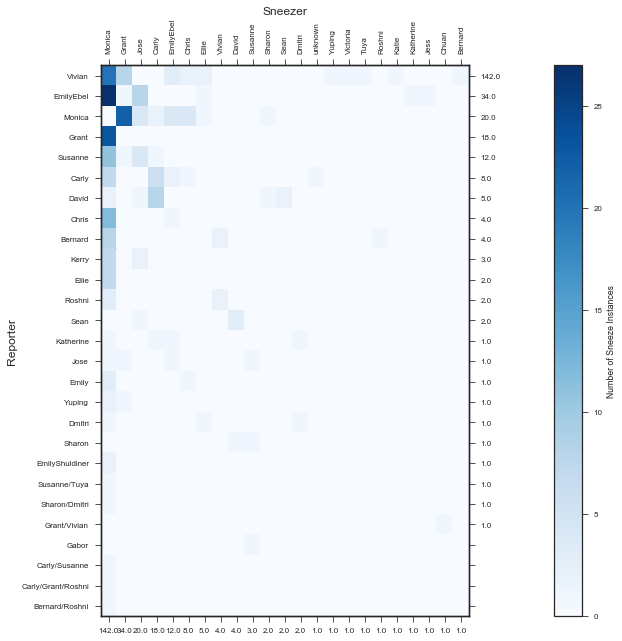

In [70]:
fig, ax1 = plt.subplots(figsize=(9,9))
pcm = plt.pcolormesh(interactions,cmap='Blues')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Sneeze Instances')

plt.title('')

# plt.plot(np.asarray(range(len(interactions[0])))+0.5,np.asarray(range(len(interactions[0])))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# plt.xlabel('Percentage of Reads to Correct i7 Index',fontsize=11)
plt.xticks(np.asarray(range(len(interactions[0])))+0.5,[sum(interactions[:,i]) for i in range(len(sneezers))])
plt.ylabel('Reporter',fontsize=12)
plt.yticks(np.asarray(range(len(interactions)))+0.5,reporters)

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
# ax2.set_ylabel('Percentage of Reads to Correct guide ID',fontsize=11)
ax2.set_yticks(np.asarray(range(len(interactions[:])))+0.5)
ax2.set_yticklabels([sum(interactions[:,i]) for i in range(len(sneezers))])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(interactions[0])))+0.5)
ax3.set_xticklabels(sneezers,rotation=90)
ax3.set_xlabel('Sneezer',fontsize=12)
# leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
# for text in leg.get_texts():
#     text.set_color('r')
plt.tight_layout()

In [9]:
grant = data[data['Person']=='Grant']

[(y,x) for x,y in zip(np.unique(grant['ReportedBy'].values,return_counts=True)[0],np.unique(grant['ReportedBy'].values,return_counts=True)[1])]

[(1, 'EmilyEbel'), (1, 'Jose'), (9, 'Monica')]

In [10]:
jose = data[data['Person']=='Jose']

[(y,x) for x,y in zip(np.unique(jose['ReportedBy'].values,return_counts=True)[0],np.unique(jose['ReportedBy'].values,return_counts=True)[1])]

[(3, 'EmilyEbel'), (2, 'Kerry'), (1, 'Monica'), (1, 'Sean'), (3, 'Susanne')]

In [72]:
class NullObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        pass

def text_color_legend(ax, visible_handles=False, legend_prop={'weight':'semibold'}, bbox_to_anchor=(1, 1), **kargs):
    """text_color_legend() -> eliminates legend key and simply colors labels with the color of the lines."""
    handles, labels = ax.get_legend_handles_labels()
#     handles = [handle[0] if type(handles) == list else handle for handle in handles]
    if not visible_handles: 
        kargs['handler_map'] = {handle:NullObjectHandler() for handle in handles}
    L = ax.legend(handles, labels, prop=legend_prop, borderaxespad=0, bbox_to_anchor=bbox_to_anchor, **kargs,loc='upper right')
    for handle, text in zip(handles, L.get_texts()):
        text.set_color(handle.get_facecolor())
#         text.set_fontweight('bold')
        text.set_alpha(1)
#         text.set_fontsize(12)
    return L

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


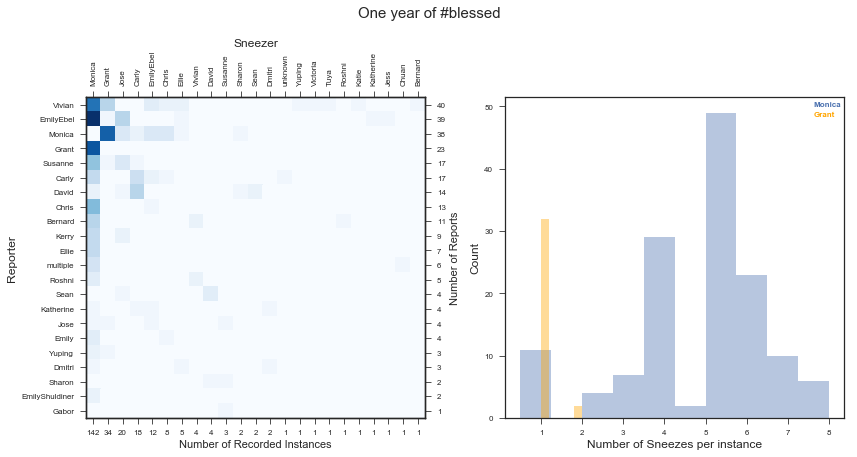

In [554]:
sns.set(font='arial',context='paper',style='ticks')

plt.figure(figsize=(12,6))
plt.suptitle("One year of #blessed",y=1.05,fontsize=15)

ax1 = plt.subplot(1,2,1)

pcm = plt.pcolormesh(interactions,cmap='Blues')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Sneeze Instances')

plt.title('')

# plt.plot(np.asarray(range(len(interactions[0])))+0.5,np.asarray(range(len(interactions[0])))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

plt.xlabel('Number of Recorded Instances',fontsize=11)
plt.xticks(np.asarray(range(len(interactions[0])))+0.5,[int(sum(interactions[:,i])) for i in range(len(sneezers))])

plt.ylabel('Reporter',fontsize=12)
plt.yticks(np.asarray(range(len(interactions)))+0.5,reporters)

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Number of Reports',fontsize=11)
ax2.set_yticks(np.asarray(range(len(interactions[:])))+0.5)
ax2.set_yticklabels([int(sum(interactions[i,:])) for i in range(len(reporters))])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(interactions[0])))+0.5)
ax3.set_xticklabels(sneezers,rotation=90)
ax3.set_xlabel('Sneezer',fontsize=12)
# leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
# for text in leg.get_texts():
#     text.set_color('r')
plt.tight_layout()





ax = plt.subplot(1,2,2)
# plt.title('Sneeze distributions')
sns.distplot(sorted(data[data['Person']=='Monica']['Number'].values)[:-1],kde=False,norm_hist=False,label='Monica')
sns.distplot(data[data['Person']=='Grant']['Number'].values,kde=False,norm_hist=False,color='orange',label='Grant')
# plt.axvline(np.mean((sorted(data[data['Person']=='Monica']['Number'].values)[:-1])),color='b')
# plt.axvline(np.mean(data[data['Person']=='Grant']['Number'].values),color='orange')
text_color_legend(ax)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Number of Sneezes per instance',fontsize=12)

# ax = plt.subplot(2,2,3)

# ax = plt.subplot(2,2,4)


plt.tight_layout()

# handlax.get_legend_handles_labels()[0][]
# sns.distplot(data[data['Person']=='Jose']['Number'].values,kde=False,norm_hist=False)

# plt.savefig('1yr_of_#blessed.png',bbox_inches='tight',dpi=200)


In [ ]:
desk_distance = np.zeros((len(reporters),len(sneezers)))

desk_distance['Grant'] = {''}


for r,reporter in enumerate(reporters):
    for s,sneezer in enumerate(sneezers):
        interactions[r,s] = len(data[(data['ReportedBy']==reporter) & (data['Person']==sneezer)])
        
     

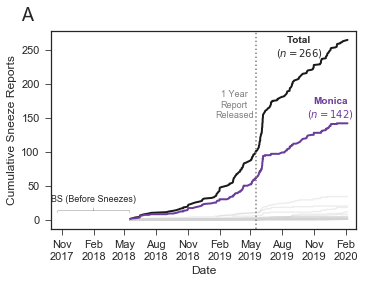

In [593]:
# fig,ax1 = plt.subplots()
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(221)
dates = matplotlib.dates.date2num(data['Datetime'].values)

person_colors = {'Monica':'#6a3d9a',
                'Grant':'#ff7f00',
                'Jose':'#1f78b4',
                'Carly':'#e31a1c',
                'EmilyEbel':'#33a02c'}
person_colors = {'Monica':'#6a3d9a'}

plt.plot(data['Datetime'].values,range(len(data['Datetime'].values)),'k',lw=2)

for person in np.unique(data['Person'].values):
    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([1 if i in report_locs else 0 for i in range(len(data['Person'].values))])
    
    if person not in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color='lightgray',alpha=0.4)

for person in np.unique(data['Person'].values):
    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([1 if i in report_locs else 0 for i in range(len(data['Person'].values))])
    if person in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)

# datemin = np.datetime64(data['Datetime'].values[0], 'M')
datemin = np.datetime64(datetime(2017,11,1), 'M')
month_diff = np.timedelta64(np.datetime64(data['Datetime'].values[-1],'M')-np.datetime64(data['Datetime'].values[0],'M'),'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')

locs = [np.datetime64(datetime(2017,11,1), 'M') + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+3)]

labels =  [entry.astype(datetime).strftime('%b %Y').replace(' ','\n') for entry in locs]
ax.set_xlim(datemin-np.timedelta64(15,'D'), datemax)
plt.xticks(locs,labels,rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneeze Reports',fontsize=12)
plt.xlabel('Date',fontsize=12)

plt.xlim(locs[0]-1,locs[-1]+1)
plt.text(x=matplotlib.dates.date2num(datetime(2019,9,20)),y=240,s=f'Total\n$(n={len(data["Number"].values)})$',fontsize=10,weight='semibold',ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2019,12,20)),y=150,s=f'Monica\n$(n={len(np.where(data["Person"].values=="Monica")[0])})$',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=45,s=f'Grant\n$(n={len(np.where(data["Person"].values=="Grant")[0])})$',fontsize=10,weight='semibold',color=person_colors['Grant'],ha='center')

plt.annotate(xy=(matplotlib.dates.date2num(datetime(2018,2,1)),10),xytext=(matplotlib.dates.date2num(datetime(2018,2,1)),30),arrowprops={'arrowstyle':'-[,widthB=4'},
             s='BS (Before Sneezes)',ha='center',va='center',fontsize=9)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,1)),y=150,s='Monica',fontsize=11,weight='semibold',color=person_colors['Monica'])
plt.text(s='A',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)
plt.axvline(datetime(2019,5,17),color='gray',linestyle=':',lw=1.5)
plt.text(x=matplotlib.dates.date2num(datetime(2019,3,15)),y=150,s='1 Year\nReport\nReleased',ha='center',fontsize=9,color='gray')

plt.savefig('#blessed_cumulative_reports.pdf',bbox_inches='tight')

# ax2 = fig.add_axes([0.25,0.3,0.25,0.5])
# ax2 = plt.subplot(222)

# plt.plot(data['Datetime'].values,np.cumsum(data['Number'].values),'k',lw=2)

# for person in np.unique(data['Person'].values):

#     report_locs = np.where(data['Person'].values==person)[0]
#     reports_cumulative = np.cumsum([data['Number'].values[i] if i in report_locs else 0 for i in range(len(data['Person'].values))])
#     if person in person_colors.keys():
#         plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)
#     else:
#         plt.plot(data['Datetime'].values,reports_cumulative,color='lightgray',alpha=0.4,lw=2)

# # locs = [np.datetime64(datetime(2017,11,1), 'M') + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+3)]

# # labels =  []
# plt.xticks(locs,labels,rotation=0,fontsize=11)
# plt.yticks([0,250,500,750,1000],[0,250,500,750,1000],fontsize=11)
# plt.ylabel('Cumulative Sneezes',fontsize=12)




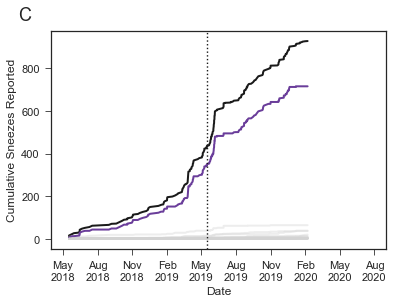

In [620]:
import matplotlib.dates as mdates
dates = matplotlib.dates.date2num(data['Datetime'].values)

person_colors = {'Monica':'#6a3d9a',
                'Grant':'#ff7f00',
                'Jose':'#1f78b4',
                'Carly':'#e31a1c',
                'EmilyEbel':'#33a02c'}
person_colors = {'Monica':'#6a3d9a'}

plt.plot(data['Datetime'].values,np.cumsum(data['Number'].values),'k',lw=2)

for person in np.unique(data['Person'].values):

    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([data['Number'].values[i] if i in report_locs else 0 for i in range(len(data['Person'].values))])
    if person in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)
    else:
        plt.plot(data['Datetime'].values,reports_cumulative,color='lightgray',alpha=0.4,lw=2)

datemin = np.datetime64(data['Datetime'].values[0], 'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%m ')
# locs,labels = plt.xticks()
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported')
plt.xlabel('Date')
# plt.yscale('log')

datemin = np.datetime64(data['Datetime'].values[0], 'M')
# datemin = np.datetime64(datetime(2017,11,1), 'M')
month_diff = np.timedelta64(np.datetime64(data['Datetime'].values[-1],'M')-np.datetime64(data['Datetime'].values[0],'M'),'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')

locs = [datemin + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+3)]

labels =  [entry.astype(datetime).strftime('%b %Y').replace(' ','\n') for entry in locs]
ax.set_xlim(datemin-np.timedelta64(15,'D'), datemax)
plt.xticks(locs,labels,rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported',fontsize=12)
plt.xlabel('Date',fontsize=12)

plt.plot()

plt.xlim(locs[0]-1,locs[-1]+1)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,9,20)),y=240,s=f'Total\n$(n={len(data["Number"].values)})$',fontsize=10,weight='semibold',ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,20)),y=150,s=f'Monica\n$(n={len(np.where(data["Person"].values=="Monica")[0])})$',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=45,s=f'Grant\n$(n={len(np.where(data["Person"].values=="Grant")[0])})$',fontsize=10,weight='semibold',color=person_colors['Grant'],ha='center')

# plt.annotate(xy=(matplotlib.dates.date2num(datetime(2018,2,1)),10),xytext=(matplotlib.dates.date2num(datetime(2018,2,1)),30),arrowprops={'arrowstyle':'-[,widthB=4'},
#              s='BS (Before Sneezes)',ha='center',va='center',fontsize=9)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,1)),y=150,s='Monica',fontsize=11,weight='semibold',color=person_colors['Monica'])
plt.text(s='C',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)
# plt.axvline(datetime(2019,5,17),color='gray',linestyle=':',lw=1.5)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,3,15)),y=150,s='1 Year\nReport\nReleased',ha='center',fontsize=9,color='gray')



plt.axvline(datetime(2019,5,17),color='k',linestyle=':')

In [762]:
x = (data['Datetime'].values[-1]-data['Datetime'].values[0])
days = x.astype('timedelta64[D]')
total_days = days/np.timedelta64(1, 'D')

In [763]:
monica_daily = len(sorted(data[data['Person']=='Monica']['Number'].values))/total_days
other_daily = len(sorted(data[data['Person']!='Monica']['Number'].values))/total_days

In [764]:
n_sims = 100
sim_length = 365

monica_source_dist = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
other_source_dist = data[data['Person']!='Monica']['Number'].values

sim_results = []

for sim in range(n_sims):
    sim_results.append([[],[]])
    
    for day in range(sim_length):
        if np.random.uniform(0,1) < monica_daily:
            sim_results[sim][0].append(np.random.choice(monica_source_dist,1)[0])
        else:
            sim_results[sim][0].append(0)
        
        if np.random.uniform(0,1) < other_daily:
            sim_results[sim][1].append(np.random.choice(other_source_dist,1)[0])
        else:
            sim_results[sim][1].append(0)
            
    
#     sim_results
    
    

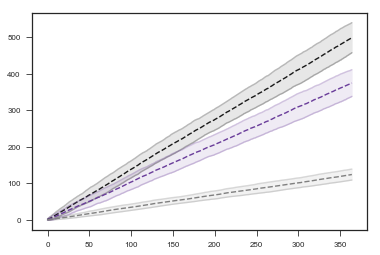

In [765]:
cumulatives_all = np.zeros((np.cumsum(sim_results[sim][0]).shape[0],n_sims))
cumulatives_monica = np.zeros((np.cumsum(sim_results[sim][0]).shape[0],n_sims))
cumulatives_others = np.zeros((np.cumsum(sim_results[sim][0]).shape[0],n_sims))

for sim in range(n_sims):
#     plt.plot(np.cumsum(sim_results[sim][0]),color=person_colors['Monica'],alpha=0.01)
#     plt.plot(np.cumsum(sim_results[sim][0])+np.cumsum(sim_results[sim][1]),'k',alpha=0.01)
#     plt.plot(np.cumsum(sim_results[sim][1]),'gray',alpha=0.01)
    
    cumulatives_all[:,sim] = np.cumsum(sim_results[sim][0])+np.cumsum(sim_results[sim][1])
    cumulatives_monica[:,sim] = np.cumsum(sim_results[sim][0])
    cumulatives_others[:,sim] = np.cumsum(sim_results[sim][1])
    
    
plt.plot(np.mean(cumulatives_all,axis=1),'k',linestyle='--')
plt.gca().fill_between(range(sim_length), 
                       np.mean(cumulatives_all,axis=1)-1*np.std(cumulatives_all,axis=1), 
                       np.mean(cumulatives_all,axis=1)+1*np.std(cumulatives_all,axis=1)
                      ,color='k',alpha=0.1)
plt.plot(np.mean(cumulatives_all,axis=1)+1*np.std(cumulatives_all,axis=1),'k',alpha=0.3)
plt.plot(np.mean(cumulatives_all,axis=1)-1*np.std(cumulatives_all,axis=1),'k',alpha=0.3)

plt.plot(np.mean(cumulatives_monica,axis=1),color=person_colors['Monica'],linestyle='--',)
plt.gca().fill_between(range(sim_length), 
                       np.mean(cumulatives_monica,axis=1)-1*np.std(cumulatives_monica,axis=1), 
                       np.mean(cumulatives_monica,axis=1)+1*np.std(cumulatives_monica,axis=1)
                      ,color=person_colors['Monica'],alpha=0.1)
plt.plot(np.mean(cumulatives_monica,axis=1)+1*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)
plt.plot(np.mean(cumulatives_monica,axis=1)-1*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)

plt.plot(np.mean(cumulatives_others,axis=1),color='gray',linestyle='--')
plt.gca().fill_between(range(sim_length), 
                       np.mean(cumulatives_others,axis=1)-1*np.std(cumulatives_others,axis=1), 
                       np.mean(cumulatives_others,axis=1)+1*np.std(cumulatives_others,axis=1)
                      ,color='gray',alpha=0.1)
plt.plot(np.mean(cumulatives_others,axis=1)+1*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)
plt.plot(np.mean(cumulatives_others,axis=1)-1*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)

# plt.savefig('projections_only.pdf',bbox_inches='tight')

Text(-0.1,1.05,'D')

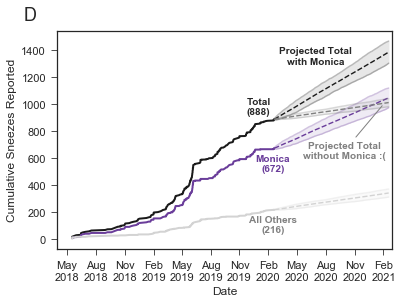

In [766]:
import matplotlib.dates as mdates

data = data[data['Number']<30]

dates = matplotlib.dates.date2num(data['Datetime'].values)

person_colors = {'Monica':'#6a3d9a'}

plt.plot(data['Datetime'].values,np.cumsum(data['Number'].values),'k',lw=2)

for person in np.unique(data['Person'].values):

    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([data['Number'].values[i] if i in report_locs else 0 for i in range(len(data['Person'].values))])
    locs_oppo = np.where(data['Person'].values!=person)[0]
    reports_opposite = np.cumsum([data['Number'].values[i] if i in locs_oppo else 0 for i in range(len(data['Person'].values))])
    
    if person in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)
        plt.plot(data['Datetime'].values,reports_opposite ,color='lightgray',lw=2)
        
    
#     else:
#         plt.plot(data['Datetime'].values,reports_cumulative,color='lightgray',alpha=0.4,lw=2)

# plt.plot(data[data['Person']])

datemin = np.datetime64(data['Datetime'].values[0], 'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%m ')
# locs,labels = plt.xticks()
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported')
plt.xlabel('Date')
# plt.yscale('log')

datemin = np.datetime64(data['Datetime'].values[0], 'M')
# datemin = np.datetime64(datetime(2017,11,1), 'M')
month_diff = np.timedelta64(np.datetime64(data['Datetime'].values[-1]+np.timedelta64(sim_length,'D'),'M')-np.datetime64(data['Datetime'].values[0],'M'),'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'D') + np.timedelta64(sim_length,'D') +  np.timedelta64(1, 'D') 

locs = [datemin + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+1)]

labels =  [entry.astype(datetime).strftime('%b %Y').replace(' ','\n') for entry in locs]
ax.set_xlim(datemin-np.timedelta64(15,'D'), datemax)
plt.xticks(locs,labels,rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported',fontsize=12)
plt.xlabel('Date',fontsize=12)

# plt.plot()
all_offset = np.cumsum(data['Number'].values)[-1]
monica_offset =  np.cumsum(data[data['Person']=='Monica']['Number'].values)[-1]
other_offset = np.cumsum(data[data['Person']!='Monica']['Number'].values)[-1]

# cumulatives_all = cumulatives_all + np.cumsum(data['Number'].values)[-1]
# cumulatives_monica = cumulatives_monica + np.cumsum(data[data['Person']=='Monica']['Number'].values)[-1]
# cumulatives_others = cumulatives_others + np.cumsum(data['Number'].values)[-1]

x_sim_data = [np.datetime64(data['Datetime'].values[-1]) + np.timedelta64(x,'D') for x in range(1,sim_length+1)]

plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1),'k',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       all_offset+np.mean(cumulatives_all,axis=1)-2*np.std(cumulatives_all,axis=1), 
                       all_offset+np.mean(cumulatives_all,axis=1)+2*np.std(cumulatives_all,axis=1)
                      ,color='k',alpha=0.1)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1)+2*np.std(cumulatives_all,axis=1),'k',alpha=0.3)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1)-2*np.std(cumulatives_all,axis=1),'k',alpha=0.3)

plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1),color=person_colors['Monica'],linestyle='--',)
plt.gca().fill_between(x_sim_data, 
                       monica_offset+np.mean(cumulatives_monica,axis=1)-2*np.std(cumulatives_monica,axis=1), 
                       monica_offset+np.mean(cumulatives_monica,axis=1)+2*np.std(cumulatives_monica,axis=1)
                      ,color=person_colors['Monica'],alpha=0.1)
plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1)+2*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)
plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1)-2*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)

plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1),color='gray',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       all_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1), 
                       all_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1)
                      ,color='gray',alpha=0.1)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)

plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1),color='lightgray',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       other_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1), 
                       other_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1)
                      ,color='lightgray',alpha=0.1)
plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1),'lightgray',alpha=0.3)
plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1),'lightgray',alpha=0.3)



plt.xlim(locs[0]-1,locs[-1]+1)
plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=925,s=f'Total\n({all_offset:.0f})',fontsize=10,weight='semibold',ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2020,2,15)),y=500,s=f'Monica\n({monica_offset:.0f})',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2020,2,15)),y=50,s=f'All Others\n({other_offset:.0f})',fontsize=10,weight='semibold',color='gray',ha='center')

plt.text(x=matplotlib.dates.date2num(datetime(2020,7,1)),y=1300,s=f'Projected Total\nwith Monica',fontsize=10,weight='semibold',ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2020,2,1)),y=600,s=f'Monica ({monica_offset:.0f})',fontsize=10,weight='semibold',color=person_colors['Monica'])
plt.annotate(xy=(matplotlib.dates.date2num(datetime(2021,2,1)),1000),xytext=(matplotlib.dates.date2num(datetime(2020,10,1)),600),
             s=f'Projected Total\nwithout Monica :(',fontsize=10,weight='semibold',color='gray',ha='center',
            arrowprops=dict(arrowstyle = "-",lw=1,color='gray'))



# plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=45,s=f'Grant\n$(n={len(np.where(data["Person"].values=="Grant")[0])})$',fontsize=10,weight='semibold',color=person_colors['Grant'],ha='center')

# plt.annotate(xy=(matplotlib.dates.date2num(datetime(2018,2,1)),10),xytext=(matplotlib.dates.date2num(datetime(2018,2,1)),30),arrowprops={'arrowstyle':'-[,widthB=4'},
#              s='BS (Before Sneezes)',ha='center',va='center',fontsize=9)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,1)),y=150,s='Monica',fontsize=11,weight='semibold',color=person_colors['Monica'])
plt.text(s='D',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)
# plt.axvline(datetime(2019,5,17),color='gray',linestyle=':',lw=1.5)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,3,15)),y=150,s='1 Year\nReport\nReleased',ha='center',fontsize=9,color='gray')


# plt.savefig('#blessed_cumulative_withoutMonicaprojection.pdf',bbox_inches='tight')
# plt.axvline(datetime(2019,5,17),color='k',linestyle=':')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


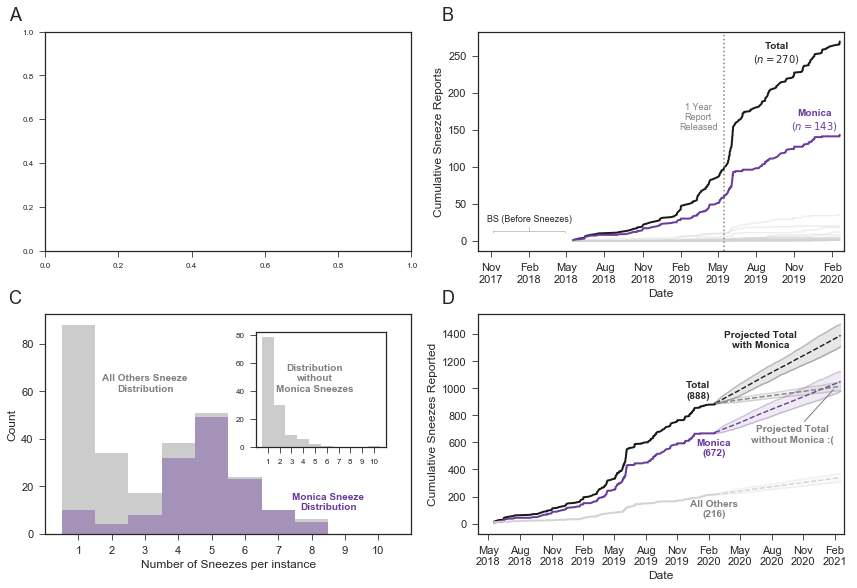

In [767]:
sns.set(font='arial',context='paper',style='ticks')

fig = plt.figure(figsize=(12,8))

ax0 = plt.subplot(221)
plt.text(s='A',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)

ax1 = plt.subplot(222)
dates = matplotlib.dates.date2num(data['Datetime'].values)

person_colors = {'Monica':'#6a3d9a'}

plt.plot(data['Datetime'].values,range(len(data['Datetime'].values)),'k',lw=2)

for person in np.unique(data['Person'].values):
    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([1 if i in report_locs else 0 for i in range(len(data['Person'].values))])
    
    if person not in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color='lightgray',alpha=0.4)

for person in np.unique(data['Person'].values):
    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([1 if i in report_locs else 0 for i in range(len(data['Person'].values))])
    if person in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)

# datemin = np.datetime64(data['Datetime'].values[0], 'M')
datemin = np.datetime64(datetime(2017,11,1), 'M')
month_diff = np.timedelta64(np.datetime64(data['Datetime'].values[-1],'M')-np.datetime64(data['Datetime'].values[0],'M'),'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')

locs = [np.datetime64(datetime(2017,11,1), 'M') + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+3)]

labels =  [entry.astype(datetime).strftime('%b %Y').replace(' ','\n') for entry in locs]
ax.set_xlim(datemin-np.timedelta64(15,'D'), datemax)
plt.xticks(locs,labels,rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneeze Reports',fontsize=12)
plt.xlabel('Date',fontsize=12)

plt.xlim(locs[0]-1,locs[-1]+1)
plt.text(x=matplotlib.dates.date2num(datetime(2019,9,20)),y=240,s=f'Total\n$(n={len(data["Number"].values)})$',fontsize=10,weight='semibold',ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2019,12,20)),y=150,s=f'Monica\n$(n={len(np.where(data["Person"].values=="Monica")[0])})$',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=45,s=f'Grant\n$(n={len(np.where(data["Person"].values=="Grant")[0])})$',fontsize=10,weight='semibold',color=person_colors['Grant'],ha='center')

plt.annotate(xy=(matplotlib.dates.date2num(datetime(2018,2,1)),10),xytext=(matplotlib.dates.date2num(datetime(2018,2,1)),30),arrowprops={'arrowstyle':'-[,widthB=4'},
             s='BS (Before Sneezes)',ha='center',va='center',fontsize=9)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,1)),y=150,s='Monica',fontsize=11,weight='semibold',color=person_colors['Monica'])
plt.text(s='B',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)
plt.axvline(datetime(2019,5,17),color='gray',linestyle=':',lw=1.5)
plt.text(x=matplotlib.dates.date2num(datetime(2019,3,15)),y=150,s='1 Year\nReport\nReleased',ha='center',fontsize=9,color='gray')



# fig,ax1 = plt.subplots(figsize=(6,4))

ax2 = plt.subplot(223)
all_sneezes = sorted(data['Number'].values)[:-1]
vals,bins = np.histogram(all_sneezes)
sns.distplot(all_sneezes,color='gray',kde=False,bins=range(1,12))

to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
sns.distplot(to_plot,kde=False,bins=range(1,12),color=person_colors['Monica'])
plt.text(x=3.5,y=60,s=f'All Others Sneeze\nDistribution',fontsize=10,weight='semibold',color='gray',ha='center')


plt.text(x=9,y=10,s=f'Monica Sneeze\nDistribution',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')

plt.xticks([i+0.5 for i in range(1,11)],range(1,11),fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel(fr'Count',fontsize=12)
plt.xlabel('Number of Sneezes per instance',fontsize=12)

plt.text(s='C',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)

# ax2 = fig.add_axes([0.6,0.35,0.28,0.5])
ax_mini = plt.axes([.3, .25, .15, .2])
sns.distplot(data[data['Person']!='Monica']['Number'].values,kde=False,color='gray',bins=range(1,12))
plt.xticks([i+0.5 for i in range(1,11)],range(1,11))
plt.xlim(0.5,11.5)
plt.text(x=5.5,y=40,s=f'Distribution\nwithout\nMonica Sneezes',fontsize=10,weight='semibold',color='gray',ha='center')





ax3 = plt.subplot(224)

data = data[data['Number']<30]

dates = matplotlib.dates.date2num(data['Datetime'].values)

person_colors = {'Monica':'#6a3d9a'}

plt.plot(data['Datetime'].values,np.cumsum(data['Number'].values),'k',lw=2)

for person in np.unique(data['Person'].values):

    report_locs = np.where(data['Person'].values==person)[0]
    reports_cumulative = np.cumsum([data['Number'].values[i] if i in report_locs else 0 for i in range(len(data['Person'].values))])
    locs_oppo = np.where(data['Person'].values!=person)[0]
    reports_opposite = np.cumsum([data['Number'].values[i] if i in locs_oppo else 0 for i in range(len(data['Person'].values))])
    
    if person in person_colors.keys():
        plt.plot(data['Datetime'].values,reports_cumulative,color=person_colors[person],lw=2)
        plt.plot(data['Datetime'].values,reports_opposite ,color='lightgray',lw=2)
        

datemin = np.datetime64(data['Datetime'].values[0], 'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'M') + np.timedelta64(1, 'M')
plt.gca().set_xlim(datemin, datemax)
plt.gca().format_xdata = mdates.DateFormatter('%m ')
# locs,labels = plt.xticks()
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported')
plt.xlabel('Date')
# plt.yscale('log')

datemin = np.datetime64(data['Datetime'].values[0], 'M')
# datemin = np.datetime64(datetime(2017,11,1), 'M')
month_diff = np.timedelta64(np.datetime64(data['Datetime'].values[-1]+np.timedelta64(sim_length,'D'),'M')-np.datetime64(data['Datetime'].values[0],'M'),'M')
datemax = np.datetime64(data['Datetime'].values[-1], 'D') + np.timedelta64(sim_length,'D') +  np.timedelta64(1, 'D') 

locs = [datemin + np.timedelta64(3*x, 'M') for x in range(int(month_diff/3)+1)]

labels =  [entry.astype(datetime).strftime('%b %Y').replace(' ','\n') for entry in locs]
ax.set_xlim(datemin-np.timedelta64(15,'D'), datemax)
plt.xticks(locs,labels,rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Cumulative Sneezes Reported',fontsize=12)
plt.xlabel('Date',fontsize=12)

# plt.plot()
all_offset = np.cumsum(data['Number'].values)[-1]
monica_offset =  np.cumsum(data[data['Person']=='Monica']['Number'].values)[-1]
other_offset = np.cumsum(data[data['Person']!='Monica']['Number'].values)[-1]

# cumulatives_all = cumulatives_all + np.cumsum(data['Number'].values)[-1]
# cumulatives_monica = cumulatives_monica + np.cumsum(data[data['Person']=='Monica']['Number'].values)[-1]
# cumulatives_others = cumulatives_others + np.cumsum(data['Number'].values)[-1]

x_sim_data = [np.datetime64(data['Datetime'].values[-1]) + np.timedelta64(x,'D') for x in range(1,sim_length+1)]

plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1),'k',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       all_offset+np.mean(cumulatives_all,axis=1)-2*np.std(cumulatives_all,axis=1), 
                       all_offset+np.mean(cumulatives_all,axis=1)+2*np.std(cumulatives_all,axis=1)
                      ,color='k',alpha=0.1)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1)+2*np.std(cumulatives_all,axis=1),'k',alpha=0.3)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_all,axis=1)-2*np.std(cumulatives_all,axis=1),'k',alpha=0.3)

plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1),color=person_colors['Monica'],linestyle='--',)
plt.gca().fill_between(x_sim_data, 
                       monica_offset+np.mean(cumulatives_monica,axis=1)-2*np.std(cumulatives_monica,axis=1), 
                       monica_offset+np.mean(cumulatives_monica,axis=1)+2*np.std(cumulatives_monica,axis=1)
                      ,color=person_colors['Monica'],alpha=0.1)
plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1)+2*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)
plt.plot(x_sim_data,monica_offset+np.mean(cumulatives_monica,axis=1)-2*np.std(cumulatives_monica,axis=1),person_colors['Monica'],alpha=0.3)

plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1),color='gray',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       all_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1), 
                       all_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1)
                      ,color='gray',alpha=0.1)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)
plt.plot(x_sim_data,all_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1),'gray',alpha=0.3)

plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1),color='lightgray',linestyle='--')
plt.gca().fill_between(x_sim_data, 
                       other_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1), 
                       other_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1)
                      ,color='lightgray',alpha=0.1)
plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1)+2*np.std(cumulatives_others,axis=1),'lightgray',alpha=0.3)
plt.plot(x_sim_data,other_offset+np.mean(cumulatives_others,axis=1)-2*np.std(cumulatives_others,axis=1),'lightgray',alpha=0.3)



plt.xlim(locs[0]-1,locs[-1]+1)
plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=925,s=f'Total\n({all_offset:.0f})',fontsize=10,weight='semibold',ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2020,2,15)),y=500,s=f'Monica\n({monica_offset:.0f})',fontsize=10,weight='semibold',color=person_colors['Monica'],ha='center')
plt.text(x=matplotlib.dates.date2num(datetime(2020,2,15)),y=50,s=f'All Others\n({other_offset:.0f})',fontsize=10,weight='semibold',color='gray',ha='center')

plt.text(x=matplotlib.dates.date2num(datetime(2020,7,1)),y=1300,s=f'Projected Total\nwith Monica',fontsize=10,weight='semibold',ha='center')
# plt.text(x=matplotlib.dates.date2num(datetime(2020,2,1)),y=600,s=f'Monica ({monica_offset:.0f})',fontsize=10,weight='semibold',color=person_colors['Monica'])
plt.annotate(xy=(matplotlib.dates.date2num(datetime(2021,2,1)),1000),xytext=(matplotlib.dates.date2num(datetime(2020,10,1)),600),
             s="Projected Total\nwithout Monica :(",fontsize=10,weight='semibold',color='gray',ha='center',
            arrowprops=dict(arrowstyle = "-",lw=1,color='gray'))



# plt.text(x=matplotlib.dates.date2num(datetime(2020,1,1)),y=45,s=f'Grant\n$(n={len(np.where(data["Person"].values=="Grant")[0])})$',fontsize=10,weight='semibold',color=person_colors['Grant'],ha='center')

# plt.annotate(xy=(matplotlib.dates.date2num(datetime(2018,2,1)),10),xytext=(matplotlib.dates.date2num(datetime(2018,2,1)),30),arrowprops={'arrowstyle':'-[,widthB=4'},
#              s='BS (Before Sneezes)',ha='center',va='center',fontsize=9)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,12,1)),y=150,s='Monica',fontsize=11,weight='semibold',color=person_colors['Monica'])
plt.text(s='D',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)
# plt.axvline(datetime(2019,5,17),color='gray',linestyle=':',lw=1.5)
# plt.text(x=matplotlib.dates.date2num(datetime(2019,3,15)),y=150,s='1 Year\nReport\nReleased',ha='center',fontsize=9,color='gray')

plt.tight_layout()

plt.savefig('#blessed_complete_no_schematic_newData.pdf',bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


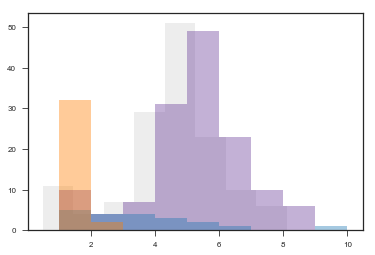

In [377]:
plt.figure(figsize=(6,4))
all_sneezes = sorted(data['Number'].values)[:-1]
vals,bins = np.histogram(all_sneezes)
sns.distplot(to_plot,color='lightgray',kde=False,bins=bins)
# 
to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
sns.distplot(to_plot,kde=False,bins=range(1,11),color=person_colors['Monica'])
sns.distplot(data[data['Person']=='Jose']['Number'].values,kde=False,bins=range(1,11),color=person_colors['Jose'])
sns.distplot(data[data['Person']=='Grant']['Number'].values,kde=False,bins=range(1,11),color=person_colors['Grant'])
# ax = sns.distplot(to_plot,
#              kde=False,norm_hist=False,bins=range(1,10),color='#6a3d9a')
sns.despine(top=True,right=True,ax=ax)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'We were so #blessed to have you!')

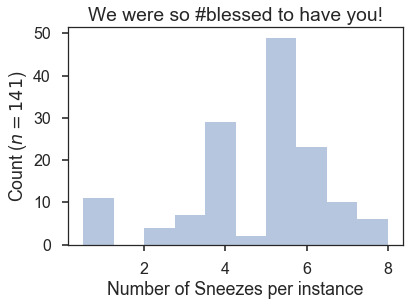

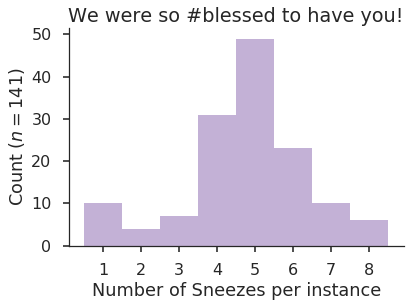

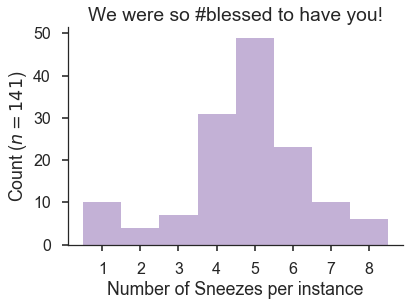

In [88]:
# sns.set_context('poster')
sns.set(font='arial',context='paper',style='ticks')

plt.figure(figsize=(6,4))
to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
sns.distplot(to_plot,kde=False)
# ax = sns.distplot(to_plot,
#              kde=False,norm_hist=False,bins=range(1,10),color='#6a3d9a')
sns.despine(top=True,right=True,ax=ax)

# plt.xticks([i+0.5 for i in range(1,9)],range(1,9))
plt.ylabel(fr'Count ($n={len(to_plot)}$)')
plt.xlabel('Number of Sneezes per instance')


plt.title('We were so #blessed to have you!')

sns.set(font='Avenir',context='poster',style='ticks')

plt.figure(figsize=(6,4))
to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
ax = sns.distplot(to_plot,
             kde=False,norm_hist=False,bins=range(1,10),color='#6a3d9a')
sns.despine(top=True,right=True,ax=ax)

plt.xticks([i+0.5 for i in range(1,9)],range(1,9))
plt.ylabel(fr'Count ($n={len(to_plot)}$)')
plt.xlabel('Number of Sneezes per instance')


plt.title('We were so #blessed to have you!')

sns.set(font='sans-serif',context='poster',style='ticks')

plt.figure(figsize=(6,4))
to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
ax = sns.distplot(to_plot,
             kde=False,norm_hist=False,bins=range(1,10),color='#6a3d9a')
sns.despine(top=True,right=True,ax=ax)

plt.xticks([i+0.5 for i in range(1,9)],range(1,9))
plt.ylabel(fr'Count ($n={len(to_plot)}$)')
plt.xlabel('Number of Sneezes per instance')


plt.title('We were so #blessed to have you!')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.5, 11.5)

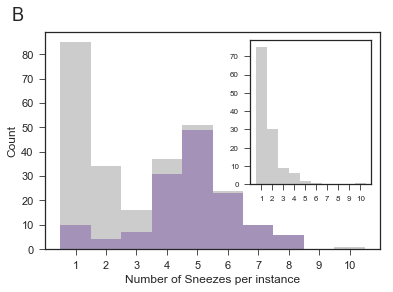

In [601]:
sns.set(font='arial',context='paper',style='ticks')
fig,ax1 = plt.subplots(figsize=(6,4))
all_sneezes = sorted(data['Number'].values)[:-1]
vals,bins = np.histogram(all_sneezes)
sns.distplot(all_sneezes,color='gray',kde=False,bins=range(1,12))

to_plot = sorted(data[data['Person']=='Monica']['Number'].values)[:-1]
sns.distplot(to_plot,kde=False,bins=range(1,12),color=person_colors['Monica'])

plt.xticks([i+0.5 for i in range(1,11)],range(1,11),fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel(fr'Count',fontsize=12)
plt.xlabel('Number of Sneezes per instance',fontsize=12)

plt.text(s='B',x=-0.1,y=1.05,transform=plt.gca().transAxes,fontsize=18)

# ax2 = fig.add_axes([0.6,0.35,0.28,0.5])
ax2 = plt.axes([.6, .35, .28, .5])
sns.distplot(data[data['Person']!='Monica']['Number'].values,kde=False,color='gray',bins=range(1,12))
plt.xticks([i+0.5 for i in range(1,11)],range(1,11))
plt.xlim(0.5,11.5)



# plt.savefig('#blessed_sneeze_distribution_inset.pdf',bbox_inches='tight')

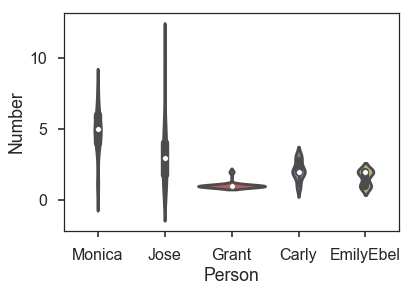

In [473]:
sns.set(font='arial',context='poster',style='ticks')
pared_data = data[data['Person'].isin(['Monica','Grant','Jose','Carly','EmilyEbel'])]
pared_data = pared_data[pared_data['Number']<30]

sns.violinplot(data=pared_data,y='Number',x='Person',width=1)

In [598]:
matplotlib.__version__

'2.2.0'

In [582]:
var = np.var(sorted(data[data['Person']=='Monica']['Number'].values)[:-1])
mean = np.mean(sorted(data[data['Person']=='Monica']['Number'].values)[:-1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


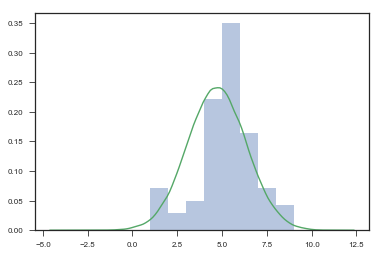

In [591]:
sns.distplot(sorted(data[data['Person']=='Monica']['Number'].values)[:-1],
             kde=False,norm_hist=True,bins=range(1,12))

sns.distplot([np.random.normal(mean,np.sqrt(var),int(1e5))],hist=False,kde=True)

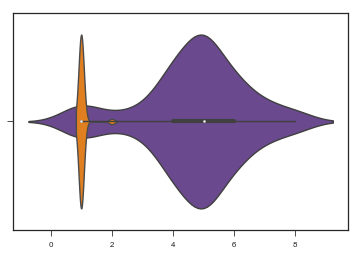

In [461]:
sns.violinplot(sorted(data[data['Person']=='Monica']['Number'].values)[:-1],color=person_colors['Monica'],alpha=0.4,vert=True)
sns.violinplot(sorted(data[data['Person']=='Grant']['Number'].values)[:-1],color=person_colors['Grant'],alpha=0.4,vert=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


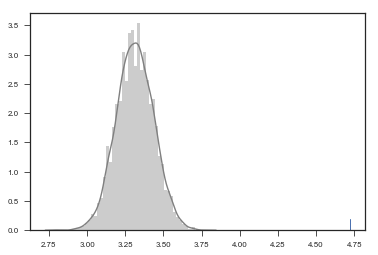

In [449]:
perms = 1e4
perm_means = []
for perm in range(int(perms)):
    perm_means.append(np.mean(np.random.choice(sorted(data['Number'].values)[:-1],len(data[data['Person']=='Monica']['Number'].values)-1,replace=False)))
    

    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


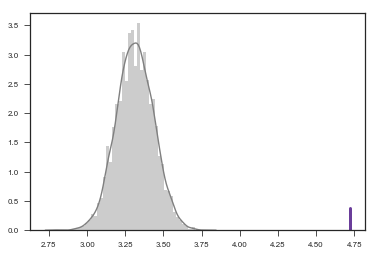

In [454]:
sns.distplot(perm_means,color='gray')
sns.rugplot([np.mean(sorted(data[data['Person']=='Monica']['Number'].values)[:-1])],color=person_colors['Monica'],lw=3,height=0.1)

In [63]:
G = nx.DiGraph()

l = []
for reporter in np.unique(data['ReportedBy'].values):
    if reporter not in l:
        G.add_node(f'{reporter}')
        l.append(reporter)
    for sneezer in np.unique(data['Person'].values):
        this_combo = data[(data['ReportedBy']==reporter) & (data['Person']==sneezer)]
        print(this_combo)
        if sneezer not in l:
            G.add_node(f'{sneezer}')
            l.append(sneezer)
        if len(this_combo.index) >0:
            G.add_edge(f'{reporter}',f'{sneezer}',weight=len(this_combo.index))
            
        
        

Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
    Person  Number ReportedBy Datetime
25  Monica     5.0    Bernard      NaN
54  Monica     4.0    Bernard      NaN
69  Monica     5.0    Bernard      NaN
73  Monica     6.0    Bernard      NaN
79  Monica     6.0    Bernard      NaN
81  Monica     5.0    Bernard      NaN
    Person  Number ReportedBy Datetime
85  Roshni     2.0    Bernard      NaN
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Dat

Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
Empty DataFrame
Columns: [Person, Number, ReportedBy, Datetime]
Index: []
   Person  Number ReportedBy Datetime
9    Jose     4.0    Susanne      NaN
42   Jose     2.0    Susanne      NaN
84   Jose     3.5    Susanne      NaN
    Person  Number ReportedBy Datetime
6   Monica     8.0    Susanne      NaN
15  Monica     5.0    Susanne      NaN
27  Monica     4.0    Susanne      NaN
29  Monica     5.0    Susa

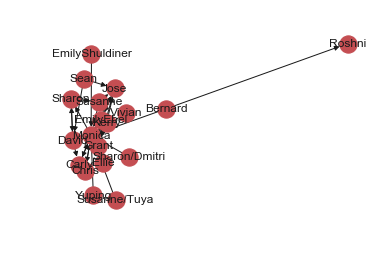

In [69]:
nx.draw_networkx(G)
limits = plt.axis('off')